# Exploratory Data Analysis

## Import packages

In [475]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [476]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [477]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


---
## Loading data

In [529]:
# Actual dataset
meteorology = pd.read_excel('https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/meteo%20data%20hourly.xlsx')
air_quality_sensors_NO2_O3 = pd.read_excel('https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/no2%20o3%20sensors%2010%20mins.xlsx')
air_quality_sensors_SO2_CO = pd.read_excel('https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/so2%20co%20sensor%2010%20mins.xlsx')
bandung = pd.read_excel('https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/bandung%2010%20mins.xlsx')
jabodetabek_cities = pd.read_excel('https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/jabodetabek%20city%2010%20mins.xlsx')
jabodetabek_stations = pd.read_excel('https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/jabodetabek%2020%20stations%2010%20mins.xlsx')
office_senopati = pd.read_excel('https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/office%20in%20senopati%20.xlsx')

In [479]:
# Additional dataset
climatology = pd.ExcelFile('https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/Climate%20Data%20Explorer/caitindonesia.xlsx')
historical_emissions = pd.read_csv('https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/Climate%20Watch/historical_emissions.csv')

### Meteorological data

In [530]:
meteorology.head()

,Unnamed: 0,SENSOR,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,Ancol,NaN,NaN,NaN,NaN,NaN,Bekasi Selatan,NaN,NaN,NaN,NaN,NaN,Cibubur,NaN,NaN,NaN,NaN,NaN,Cinere,NaN,NaN,NaN,NaN,NaN,Gelora,NaN,NaN,NaN,NaN,NaN
1,Hour of DATETIME,Clouds,FEELS LIKE,RAIN,WIND DIRECTION,WIND GUST,WIND SPEED,Clouds,FEELS LIKE,RAIN,WIND DIRECTION,WIND GUST,WIND SPEED,Clouds,FEELS LIKE,RAIN,WIND DIRECTION,WIND GUST,WIND SPEED,Clouds,FEELS LIKE,RAIN,WIND DIRECTION,WIND GUST,WIND SPEED,Clouds,FEELS LIKE,RAIN,WIND DIRECTION,WIND GUST,WIND SPEED
2,"July 1, 2023, 12 AM",58,20,0,143,1.51,1.07,10,30.92,0,164,1.32,1.11,18,30.6,0,185,1.28,1.15,32,30.75,0,193,1.31,1.13,20,31.35,0,0,NaN,1.03
3,"July 1, 2023, 1 AM",66,18.21,0,5,1.3,0.78,6,29.74,0,190,1.68,1.19,8,29.74,0,201,1.46,1.23,8,29.91,0,206,1.47,1.28,20,30.61,0,180,NaN,1.54
4,"July 1, 2023, 2 AM",61,18.55,0,21,1.08,0.53,8,28.77,0,206,1.87,1.2,8,26.37,0,209,1.71,1.37,7,26.44,0,215,1.84,1.54,20,29.32,0,180,NaN,2.06


In [531]:
meteorology.melt(id_vars='SENSOR').head()

,SENSOR,variable,value
0,Ancol,Unnamed: 0,NaN
1,Clouds,Unnamed: 0,Hour of DATETIME
2,58,Unnamed: 0,"July 1, 2023, 12 AM"
3,66,Unnamed: 0,"July 1, 2023, 1 AM"
4,61,Unnamed: 0,"July 1, 2023, 2 AM"


In [532]:
meteorology.pivot(index='SENSOR',
                  columns='Ancol',
                  values=['Clouds', 'FEELS LIKE', 'RAIN', 'WIND DIRECTION', 'WIND GUST', 'WIND SPEED'])

KeyError: 'Ancol'

In [481]:
meteorology_link = 'https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/meteo%20data%20hourly.xlsx'

sheet_columns = {
    'ancol'         : 'A:G',
    'bekasi_selatan': 'A,H:M',
    'cibubur'       : 'A,N:S',
    'cinere'        : 'A,T:Y',
    'gelora'        : 'A,Z:AE'
}

dfs = {}
for sheet, cols in sheet_columns.items():
    dfs[sheet] = pd.read_excel(meteorology_link, header=2, usecols=cols)

for sheet, df in dfs.items():
    df.columns = df.columns.str.capitalize()                       # Change the header names to Capitalized Case
    df.rename(columns={'Hour of datetime': 'Hours'}, inplace=True) # Rename the 'Hour of datetime' column
    df['Hours'] = pd.to_datetime(df['Hours'])                      # Ensure 'Hours' column is datetime type

# Access the DataFrames using their respective sheet names
ancol = dfs['ancol']
bekasi_selatan = dfs['bekasi_selatan']
cibubur = dfs['cibubur']
cinere = dfs['cinere']
gelora = dfs['gelora']

In [482]:
ancol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Hours           744 non-null    datetime64[ns]
 1   Clouds          744 non-null    int64         
 2   Feels like      744 non-null    float64       
 3   Rain            744 non-null    float64       
 4   Wind direction  744 non-null    int64         
 5   Wind gust       744 non-null    float64       
 6   Wind speed      744 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 40.8 KB


In [483]:
ancol.head()

,Hours,Clouds,Feels like,Rain,Wind direction,Wind gust,Wind speed
0,2023-07-01 00:00:00,58,20.00,0.0,143,1.51,1.07
1,2023-07-01 01:00:00,66,18.21,0.0,5,1.30,0.78
2,2023-07-01 02:00:00,61,18.55,0.0,21,1.08,0.53
3,2023-07-01 03:00:00,65,19.08,0.0,41,1.17,0.46
4,2023-07-01 04:00:00,70,19.32,0.0,67,1.19,0.45


In [484]:
bekasi_selatan.head()

,Hours,Clouds.1,Feels like.1,Rain.1,Wind direction.1,Wind gust.1,Wind speed.1
0,2023-07-01 00:00:00,10,30.92,0.0,164,1.32,1.11
1,2023-07-01 01:00:00,6,29.74,0.0,190,1.68,1.19
2,2023-07-01 02:00:00,8,28.77,0.0,206,1.87,1.20
3,2023-07-01 03:00:00,31,26.13,0.0,207,1.48,1.03
4,2023-07-01 04:00:00,40,26.27,0.0,0,NaN,0.00


In [485]:
cibubur.head()

,Hours,Clouds.2,Feels like.2,Rain.2,Wind direction.2,Wind gust.2,Wind speed.2
0,2023-07-01 00:00:00,18,30.60,0.0,185,1.28,1.15
1,2023-07-01 01:00:00,8,29.74,0.0,201,1.46,1.23
2,2023-07-01 02:00:00,8,26.37,0.0,209,1.71,1.37
3,2023-07-01 03:00:00,20,26.61,0.0,205,1.63,1.30
4,2023-07-01 04:00:00,40,26.14,0.0,0,NaN,0.00


In [486]:
cinere.head()

,Hours,Clouds.3,Feels like.3,Rain.3,Wind direction.3,Wind gust.3,Wind speed.3
0,2023-07-01 00:00:00,32,30.75,0.0,193,1.31,1.13
1,2023-07-01 01:00:00,8,29.91,0.0,206,1.47,1.28
2,2023-07-01 02:00:00,7,26.44,0.0,215,1.84,1.54
3,2023-07-01 03:00:00,9,26.69,0.0,212,1.94,1.55
4,2023-07-01 04:00:00,40,26.08,0.0,0,NaN,0.00


In [487]:
gelora.head()

,Hours,Clouds.4,Feels like.4,Rain.4,Wind direction.4,Wind gust.4,Wind speed.4
0,2023-07-01 00:00:00,20,31.35,0.0,0,NaN,1.03
1,2023-07-01 01:00:00,20,30.61,0.0,180,NaN,1.54
2,2023-07-01 02:00:00,20,29.32,0.0,180,NaN,2.06
3,2023-07-01 03:00:00,20,26.14,0.0,0,NaN,0.51
4,2023-07-01 04:00:00,40,26.80,0.0,0,NaN,1.54


### Outdoor Gas data

In [488]:
outdoor_gas_NO2_O3 = air_quality_sensors_NO2_O3.copy()

In [489]:
outdoor_gas_NO2_O3.head()

,Unnamed: 0,name,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Panunggangan Utara,NaN,Pondok Pucung,NaN,Serpong,NaN
1,Minute of Datetime JKT (minutes),Avg. no2 (tb_measurement_values),Avg. o3 (tb_measurement_values),Avg. no2 (tb_measurement_values),Avg. o3 (tb_measurement_values),Avg. no2 (tb_measurement_values),Avg. o3 (tb_measurement_values)
2,"July 14, 2023, 12:00 AM",NaN,NaN,NaN,NaN,44.38,12.23
3,"July 14, 2023, 12:05 AM",9.15,0,53.51,13.35,43.87,13.47
4,"July 14, 2023, 12:10 AM",NaN,NaN,NaN,NaN,43.4,14.46


In [490]:
outdoor_gas_SO2_CO = air_quality_sensors_SO2_CO.copy()

In [491]:
outdoor_gas_SO2_CO.head()

,Unnamed: 0,name,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,Ancol,NaN,Gondolayu,NaN,Kembangan Selatan,NaN,Lontar,NaN,Marunda,NaN,Menteng Teuku Umar,NaN,Pakubuwono 1,NaN,Palmerah,NaN,Sayidan,NaN,Sorowajan,NaN,Universitas Gadjah Mada,NaN
1,Minute of Datetime JKT (minutes),co (tb_measurement_values),so2 (tb_measurement_values),co (tb_measurement_values),so2 (tb_measurement_values),co (tb_measurement_values),so2 (tb_measurement_values),co (tb_measurement_values),so2 (tb_measurement_values),co (tb_measurement_values),so2 (tb_measurement_values),co (tb_measurement_values),so2 (tb_measurement_values),co (tb_measurement_values),so2 (tb_measurement_values),co (tb_measurement_values),so2 (tb_measurement_values),co (tb_measurement_values),so2 (tb_measurement_values),co (tb_measurement_values),so2 (tb_measurement_values),co (tb_measurement_values),so2 (tb_measurement_values)
2,"July 14, 2023, 12:05 AM",NaN,NaN,463.55,11.54,432.15,8.34,462.93,11.82,500.33,16.75,452.45,9.09,451.71,11.31,426.74,12.75,473.47,9.96,484.98,7.71,426.5,7.54
3,"July 14, 2023, 12:15 AM",NaN,NaN,451.27,11.18,428.71,8.25,454.28,11.3,518.56,17.31,455.89,9.54,447.93,11.19,420.85,12.73,465.49,9.8,483.91,7.64,424.98,7.51
4,"July 14, 2023, 12:25 AM",NaN,NaN,444.4,10.98,424.11,8.01,446.9,11.07,528.68,17.6,457.01,9.83,447.83,11.19,418.8,12.75,457.52,9.66,486.51,7.7,423.92,7.52


### Outdoor PM2.5 data

In [603]:
bandung = pd.read_excel('https://github.com/sabirinID/Nafas-Air-Quality-Analysis/raw/main/Dataset/bandung%2010%20mins.xlsx', header=[1,2,3])
bdg_df = bandung.copy()

In [604]:
bdg_df.columns

MultiIndex([('Unnamed: 0_level_0', 'Unnamed: 0_level_1', ...),
            (           'Bandung',            'Ciroyom', ...),
            (           'Bandung',            'Ciroyom', ...),
            (           'Bandung',            'Ciroyom', ...),
            (           'Bandung',            'Ciroyom', ...),
            (           'Bandung',            'Ciroyom', ...),
            (           'Bandung',            'Ciroyom', ...),
            (           'Bandung',            'Lagadar', ...),
            (           'Bandung',            'Lagadar', ...),
            (           'Bandung',            'Lagadar', ...),
            (           'Bandung',            'Lagadar', ...),
            (           'Bandung',            'Lagadar', ...),
            (           'Bandung',            'Lagadar', ...),
            (           'Bandung',    'Lebak Siliwangi', ...),
            (           'Bandung',    'Lebak Siliwangi', ...),
            (           'Bandung',    'Lebak Siliwangi'

In [605]:
bdg_df.shape

(1152, 61)

In [606]:
bdg_df.rename(columns={'Unnamed: 0_level_0': 'Region', 'Unnamed: 0_level_1': 'Area'}, inplace=True)

In [644]:
bdg_df.head(2)

Region                               Bandung   
                              Area                               Ciroyom   
  Minute of Datetime JKT (minutes) Avg. humidity (tb_measurement_values)   
0          July 14, 2023, 12:05 AM                                 80.58  \
1          July 14, 2023, 12:15 AM                                 80.95   

                                                                       
                                                                       
  Avg. pm1 (tb_measurement_values) Avg. pm10 (tb_measurement_values)   
0                            22.01                             43.39  \
1                            22.05                             43.59   

                                                               
                                                               
  Avg. PM2,5 Avg. pressure (tb_measurement_values) Avg. Temp   
0      35.40                               1020.31     21.26  \
1      35.55                               1020.28     21.17   

                                                                           
                                Lagadar                                    
  Avg. humidity (tb_measurement_values) Avg. pm1 (tb_measurement_values)   
0                                 87.38                            38.83  \
1                                 87.63                            43.31   

                                                 
                                                 
  Avg. pm10 (tb_measurement_values) Avg. PM2,5   
0                             71.54      60.15  \
1                             78.75      67.19   

                                                    
                                                    
  Avg. pressure (tb_measurement_values) Avg. Temp   
0                               1019.20     21.38  \
1                               1019.17     21.26   

                                                                           
                        Lebak Siliwangi                                    
  Avg. humidity (tb_measurement_values) Avg. pm1 (tb_measurement_values)   
0                                 81.12                            21.86  \
1                                 81.58                            22.01   

                                                 
                                                 
  Avg. pm10 (tb_measurement_values) Avg. PM2,5   
0                             43.11      35.07  \
1                             43.53      35.39   

                                                    
                                                    
  Avg. pressure (tb_measurement_values) Avg. Temp   
0                               1020.62     21.46  \
1                               1020.58     21.37   

                                                                           
                               Lengkong                                    
  Avg. humidity (tb_measurement_values) Avg. pm1 (tb_measurement_values)   
0                                 77.61                            19.93  \
1                                 77.97                            19.50   

                                                 
                                                 
  Avg. pm10 (tb_measurement_values) Avg. PM2,5   
0                             38.65      31.43  \
1                             37.85      30.76   

                                                    
                                                    
  Avg. pressure (tb_measurement_values) Avg. Temp   
0                               1019.91     21.72  \
1                               1019.88     21.62   

                                                                           
                             Manjahlega                                    
  Avg. humidity (tb_measurement_values) Avg. pm1 (tb_measurement_values)   
0                                 87.00    

- Berdasarkan struktur datanya, dataset ini tampaknya memiliki struktur yang rumit dengan header multi-level dan kolom multi-level atau data hierarkis di mana `Bandung`, `Bandung Barat`, dan `Cimahi` adalah level pertama indeks dan `Ciroyom`, `Lagadar`, dst. adalah level kedua indeks.

In [609]:
stacked_bdg = bdg_df.stack()
stacked_bdg.head(14)

Bandung                            
                                         Ciroyom  Lagadar Lebak Siliwangi   
0 Avg. PM2,5                               35.40    60.15           35.07  \
  Avg. Temp                                21.26    21.38           21.46   
  Avg. humidity (tb_measurement_values)    80.58    87.38           81.12   
  Avg. pm1 (tb_measurement_values)         22.01    38.83           21.86   
  Avg. pm10 (tb_measurement_values)        43.39    71.54           43.11   
  Avg. pressure (tb_measurement_values)  1020.31  1019.20         1020.62   
  Minute of Datetime JKT (minutes)           NaN      NaN             NaN   
1 Avg. PM2,5                               35.55    67.19           35.39   
  Avg. Temp                                21.17    21.26           21.37   
  Avg. humidity (tb_measurement_values)    80.95    87.63           81.58   
  Avg. pm1 (tb_measurement_values)         22.05    43.31           22.01   
  Avg. pm10 (tb_measurement_values)        43.59    78.75           43.53   
  Avg. pressure (tb_measurement_values)  1020.28  1019.17         1020.58   
  Minute of Datetime JKT (minutes)           NaN      NaN             NaN   

                                                                        
                                        Lengkong Manjahlega Sukagalih   
0 Avg. PM2,5                               31.43      29.56     37.50  \
  Avg. Temp                                21.72      21.63     20.72   
  Avg. humidity (tb_measurement_values)    77.61      87.00     79.20   
  Avg. pm1 (tb_measurement_values)         19.93      19.52     23.88   
  Avg. pm10 (tb_measurement_values)        38.65      35.40     46.84   
  Avg. pressure (tb_measurement_values)  1019.91    1019.07   1020.23   
  Minute of Datetime JKT (minutes)           NaN        NaN       NaN   
1 Avg. PM2,5                               30.76      29.08     37.87   
  Avg. Temp                                21.62      21.53     20.62   
  Avg. humidity (tb_measurement_values)    77.97      87.25     79.55   
  Avg. pm1 (tb_measurement_values)         19.50      19.18     24.18   
  Avg. pm10 (tb_measurement_values)        37.85      34.82     47.46   
  Avg. pressure (tb_measurement_values)  1019.88    1019.04   1020.20   
  Minute of Datetime JKT (minutes)           NaN        NaN       NaN   

                                                  Bandung Barat              
                                        Sukamenak     Kayuambon Kertamulya   
0 Avg. PM2,5                                  NaN         41.90      77.24  \
  Avg. Temp                                   NaN         18.86      21.03   
  Avg. humidity (tb_measurement_values)       NaN         88.75      87.38   
  Avg. pm1 (tb_measurement_values)            NaN         26.86      53.69   
  Avg. pm10 (tb_measurement_values)           NaN         47.94      85.57   
  Avg. pressure (tb_measurement_values)       NaN       1025.74    1018.60   
  Minute of Datetime JKT (minutes)            NaN           NaN        NaN   
1 Avg. PM2,5                                  NaN         42.44      77.47   
  Avg. Temp                                   NaN         18.85      20.91   
  Avg. humidity (tb_measurement_values)       NaN         88.75      87.63   
  Avg. pm1 (tb_measurement_values)            NaN         27.17      53.76   
  Avg. pm10 (tb_measurement_values)           NaN         48.88      85.86   
  Avg. pressure (tb_measurement_values)       NaN       1025.71    1018.57   
  Minute of Datetime JKT (minutes)            NaN           NaN        NaN   

                                             Cimahi                   Region  
                                        Karangmekar                     Area  
0 Avg. PM2,5                                  36.90                      NaN  
  Avg. Temp                                   21.43                      NaN  
  Avg. humidity (tb_measurement_values)       80.97                      N

In [561]:
# for i, columns_old in enumerate(bdg_df.columns.levels):
#     columns_new = np.where(columns_old.str.contains('Unnamed'), '', columns_old)
#     bdg_df.rename(columns=dict(zip(columns_old, columns_new)), level=i, inplace=True)
# bdg_df.columns

In [648]:
melted_bdg = bdg_df.melt(
    # id_vars=['Region', 'Area'],
    value_vars=['Avg. humidity (tb_measurement_values)', 'Avg. pm1 (tb_measurement_values)', 'Avg. pm10 (tb_measurement_values)', 'Avg. PM2,5', 'Avg. pressure (tb_measurement_values)', 'Avg. Temp'],
    var_name=['Region', 'Area', 'Measurement'],
    value_name='Value'
    )
melted_bdg.head()

,Region,Area,Measurement,Value
0,Cimahi,Karangmekar,Avg. Temp,21.43
1,Cimahi,Karangmekar,Avg. Temp,21.32
2,Cimahi,Karangmekar,Avg. Temp,21.20
3,Cimahi,Karangmekar,Avg. Temp,21.14
4,Cimahi,Karangmekar,Avg. Temp,20.93


In [534]:
outdoor_pm_bdg = bandung.copy()

In [493]:
outdoor_pm_bdg.head()

,Unnamed: 0,region / name,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,NaN,Bandung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bandung Barat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cimahi,NaN,NaN,NaN,NaN,NaN
1,NaN,Ciroyom,NaN,NaN,NaN,NaN,NaN,Lagadar,NaN,NaN,NaN,NaN,NaN,Lebak Siliwangi,NaN,NaN,NaN,NaN,NaN,Lengkong,NaN,NaN,NaN,NaN,NaN,Manjahlega,NaN,NaN,NaN,NaN,NaN,Sukagalih,NaN,NaN,NaN,NaN,NaN,Sukamenak,NaN,NaN,NaN,NaN,NaN,Kayuambon,NaN,NaN,NaN,NaN,NaN,Kertamulya,NaN,NaN,NaN,NaN,NaN,Karangmekar,NaN,NaN,NaN,NaN,NaN
2,Minute of Datetime JKT (minutes),Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp
3,"July 14, 2023, 12:05 AM",80.58,22.01,43.39,35.4,1020.31,21.26,87.38,38.83,71.54,60.15,1019.2,21.38,81.12,21.86,43.11,35.07,1020.62,21.46,77.61,19.93,38.65,31.43,1019.91,21.72,87,19.52,35.4,29.56,1019.07,21.63,79.2,23.88,46.84,37.5,1020.23,20.72,NaN,NaN,NaN,NaN,NaN,NaN,88.75,26.86,47.94,41.9,1025.74,18.86,87.38,53.69,85.57,77.24,1018.6,21.03,80.97,23.22,45.24,36.9,1020.19,21.43
4,"July 14, 2023, 12:15 AM",80.95,22.05,43.59,35.55,1020.28,21.17,87.63,43.31,78.75,67.19,1019.17,21.26,81.58,22.01,43.53,35.39,1020.58,21.37,77.97,19.5,37.85,30.76,1019.88,21.62,87.25,19.18,34.82,29.08,1019.04,21.53,79.55,24.18,47.46,37.87,1020.2,20.62,NaN,NaN,NaN,NaN,NaN,NaN,88.75,27.17,48.88,42.44,1025.71,18.85,87.63,53.76,85.86,77.47,1018.57,20.91,81.34,23.15,45.14,36.79,1020.14,21.32


In [494]:
outdoor_pm_jc = jabodetabek_cities.copy()

In [495]:
outdoor_pm_jc.head()

,Unnamed: 0,region,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,NaN,Bekasi,NaN,NaN,NaN,NaN,NaN,NaN,Central Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,Depok,NaN,NaN,NaN,NaN,NaN,NaN,East Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,North Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,South Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,South Tangerang,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang,NaN,NaN,NaN,NaN,NaN,NaN,West Jakarta,NaN,NaN,NaN,NaN,NaN,NaN
1,Minute of Datetime JKT (minutes),Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp
2,"July 1, 2023, 12:00 AM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179,91.13,78.23,117.85,110.9,1012.4,25.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189,92.69,89.99,138.89,130.51,1010.15,26.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"July 1, 2023, 12:05 AM",169.555556,88.156667,60.375556,107.536667,96.193333,1009.812222,26.14,157.857143,86.816667,47.432857,74.625714,69.805714,1010.058571,26.846667,161.5,89.35125,51.1375,86.91875,80.09875,1011.49875,25.76875,168,87.53,62.19,96.256,89.334,1010.324,26.186667,135.111111,81.995556,36.37,59.614444,55,1010.866667,26.582222,158.057143,85.783429,48.22,77.668857,72.409143,1010.550857,26.184571,169,90.14,62.537692,102.015385,94.724615,1010.424615,25.528333,163.25,91.39375,52.0075,87.66125,80.5775,1010.17125,25.64,164.866667,87.919333,54.904667,89.461333,83.308,1010.201333,26.654667
4,"July 1, 2023, 12:10 AM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,91.38,73.76,111.21,104.45,1012.33,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187,93.06,87.08,134.65,126.54,1010.08,26.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [496]:
outdoor_pm_js = jabodetabek_stations.copy()

In [497]:
outdoor_pm_js.head()

,Unnamed: 0,region / name,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
0,NaN,Bekasi,NaN,NaN,NaN,NaN,NaN,NaN,Central Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,Depok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Tangerang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Bekasi Selatan,NaN,NaN,NaN,NaN,NaN,NaN,Wahid Hasyim,NaN,NaN,NaN,NaN,NaN,NaN,Limo,NaN,NaN,NaN,NaN,NaN,NaN,Tanah Baru,NaN,NaN,NaN,NaN,NaN,NaN,Cipinang Besar,NaN,NaN,NaN,NaN,NaN,NaN,Condet,NaN,NaN,NaN,NaN,NaN,NaN,Duren Sawit,NaN,NaN,NaN,NaN,NaN,NaN,Pluit,NaN,NaN,NaN,NaN,NaN,NaN,Tanjung Priok,NaN,NaN,NaN,NaN,NaN,NaN,Pondok Pinang,NaN,NaN,NaN,NaN,NaN,NaN,SCBD,NaN,NaN,NaN,NaN,NaN,NaN,Senopati,NaN,NaN,NaN,NaN,NaN,NaN,Alam Sutera,NaN,NaN,NaN,NaN,NaN,NaN,Bintaro,NaN,NaN,NaN,NaN,NaN,NaN,Legoso,NaN,NaN,NaN,NaN,NaN,NaN,Lengkong Wetan,NaN,NaN,NaN,NaN,NaN,NaN,Cikokol,NaN,NaN,NaN,NaN,NaN,NaN,Sampora,NaN,NaN,NaN,NaN,NaN,NaN,Duri Utara,NaN,NaN,NaN,NaN,NaN,NaN,Joglo,NaN,NaN,NaN,NaN,NaN,NaN
2,Minute of Datetime JKT (minutes),Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measurement_values),Avg. pm1 (tb_measurement_values),Avg. pm10 (tb_measurement_values),"Avg. PM2,5",Avg. pressure (tb_measurement_values),Avg. Temp,Avg. AQI,Avg. humidity (tb_measuremen

### Indoor PM2.5 data

In [498]:
indoor_pm = office_senopati.copy()

In [499]:
indoor_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Minute of DateTimeJKT minutes  11099 non-null  object 
 1   Aqi                            11099 non-null  int64  
 2   Co2                            11099 non-null  int64  
 3   Humidity                       11099 non-null  float64
 4   Pm1                            11099 non-null  int64  
 5   Pm10                           11099 non-null  int64  
 6   Pm25                           11099 non-null  int64  
 7   Temperature                    11099 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 693.8+ KB


In [500]:
indoor_pm.head()

,Minute of DateTimeJKT minutes,Aqi,Co2,Humidity,Pm1,Pm10,Pm25,Temperature
0,14/7/2023 00.00,118,466,50.00,27,52,42,26.24
1,14/7/2023 00.01,117,466,50.04,27,51,42,26.24
2,14/7/2023 00.02,116,465,50.06,27,50,41,26.24
3,14/7/2023 00.03,112,463,50.08,27,48,40,26.24
4,14/7/2023 00.04,118,460,50.09,28,51,42,26.24


In [501]:
indoor_pm.rename(columns={'Minute of DateTimeJKT minutes': 'Minutes',
                          'Aqi'  : 'AQI', # Air quality index
                          'Co2'  : 'CO2', # Carbon dioxide
                          'Pm1'  : 'PM1', # Particulate matter 1 microns
                          'Pm10' : 'PM10',
                          'Pm25' : 'PM2.5'}, inplace=True)
indoor_pm['Minutes'] = pd.to_datetime(indoor_pm['Minutes'], format='%d/%m/%Y %H.%M')

# Verify the changes
indoor_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Minutes      11099 non-null  datetime64[ns]
 1   AQI          11099 non-null  int64         
 2   CO2          11099 non-null  int64         
 3   Humidity     11099 non-null  float64       
 4   PM1          11099 non-null  int64         
 5   PM10         11099 non-null  int64         
 6   PM2.5        11099 non-null  int64         
 7   Temperature  11099 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 693.8 KB


In [502]:
indoor_pm.head()

,Minutes,AQI,CO2,Humidity,PM1,PM10,PM2.5,Temperature
0,2023-07-14 00:00:00,118,466,50.00,27,52,42,26.24
1,2023-07-14 00:01:00,117,466,50.04,27,51,42,26.24
2,2023-07-14 00:02:00,116,465,50.06,27,50,41,26.24
3,2023-07-14 00:03:00,112,463,50.08,27,48,40,26.24
4,2023-07-14 00:04:00,118,460,50.09,28,51,42,26.24


### Climatological data

In [503]:
climatology.sheet_names

['Citation', 'EN', 'ID']

In [504]:
climate = climatology.parse('EN')
climate.head()

,Province,Capital City,Population 2010 (thousand),Provincial GDP 2010 (Million Rp.),Area Total 2010 (km2),Total Forest Land Area 2010 (ha),Emissions per capita 2010 (tCO2e/capita),Emissions Intensity 2010 (tCO2e/million Rp),Base Year,Base Year Emission (MtCO2e),Base Year Emission Agriculture and Forestry (MtCO2e),"Base Year Emission Energy, Transport, Industry (MtCO2e)",Base Year Emission Waste (MtCO2e),Primary Source of Emissions in Base Year,"Base Year Emission (RAD-GRK, 2010, MtCO2e)",Target year,Projected BAU Emission (MtCO2e),Projected BAU Emission Agriculture and Forestry (MtCO2e),"Projected BAU Emission Energy, Transport, Industry (MtCO2e)",Projected BAU Emission Waste (MtCO2e),Reduction Target (%BAU),Reduction Target (MtCO2e),Target Year Emission (MtCO2e),Target Year Emission Agriculture and Forestry (MtCO2e),"Target Year Emission Energy, Transport, Industry (MtCO2e)",Target Year Emission Waste(MtCO2e),Mitigation Activities: Agriculture and Forestry,"Mitigation Activities: Energy, Transport, and Industry",Mitigation Activities: Waste,Indication of Emissions Reduction 2010 (MtCO2e),Indication of Emissions Reduction 2011 (MtCO2e),Indication of Emissions Reduction 2012 (MtCO2e),Indication of Emissions Reduction 2013 (MtCO2e),Indication of Emissions Reduction 2014 (MtCO2e),Adaptation Included,RPJMD Period,Supportive Mission statement in RPJMD,Supportive Policy Direction in RPJMD: Agriculture and Forestry,"Supportive Policy direction in RPJMD: Energy, Transport, and Industry",Supportive Policy direction in RPJMD: Waste,Indication of challenges in RPJMD: Agriculture and Forestry,"Indication of challenges in RPJMD: Energy, Transport, and Industry",Indication of challenges in RPJMD: Waste
0,Aceh,Banda Aceh,4494.4,79145,57956,5102,10.34,587.07,2010.0,46.46,20.27,4.84,21.35,Waste,Not Available,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agriculture:\n1. Utilization of livestock manu...,Energy:\n(Household)\n1. Free of kerosene use ...,"1. Application of 3Rs Principle (Reduce, Reuse...",0.20,0.24,0.38,0.40,0.39,No,2012-2017,Mission 4: To execute Aceh’s development progr...,Strategy: Increase in public revenue through i...,Strategy: Utilization of renewable and non-ren...,No supportive policy direction found,No indication of challenges found,No indication of challenges found,No indication of challenges found
1,North Sumatera,Medan,12982.2,275057,72981.23,10331,20.03,945.3,2010.0,260.01,25.15,49.85,185.00,Waste,171.9 (2010),2020.0,254.14,199.60,49.23,5.32,24.80,63.03,191.09,163.39,26.33,1.37,Agriculture:\n1. Composting program using the ...,Energy:\n1. Increased energy use efficiency in...,1. Waste Infrastructure Improvement Program (r...,1.72,1.83,2.00,2.23,0.81,Yes,2009-2013,Mission 2: To realize a population that is sov...,Strategy: Development of community economy bas...,Program: Management of renewable energy (hydro...,No supportive policy direction found,No indication of challenges found,No indication of challenges found,No indication of challenges found
2,West Sumatera,Padang,4846.9,87227,42012.89,7067,4.01,222.91,2010.0,16.62,12.75,3.22,0.65,Agriculture and Forestry,34.8 (2010),2020.0,265.97,244.04,20.97,0.96,24.94,66.33,199.63,183.57,15.38,0.68,In the strategic plan:\n1. Development of Peop...,Energy:\n1. Energy Audit\n2. Energy Saving Pro...,\n1. Waste Management Planning Program\n2. Pro...,0.00,0.21,0.34,0.38,0.97,No,2010-2015,Mission 5: To achieve sustainable and green de...,Policy direction: Enhance the application of t...,No supportive policy direction found,Policy direction: Increased facilities for cle...,No indication of challenges found,No indication of challenges found,No indication of challenges found
3,Riau,Pekanbaru,5538.4,345774,87023.66,81164,38.5,616.62,2010.0,213.21,206.54,5.91,0.76,Agriculture and Forestry,291.89 (2010),2020.0,670.28,375.41,294.87,1.04,25.48,170.82,499.46,NaN,NaN,NaN,Agriculture:\n1. Development of plantation are...,Energy:\n1. Utilization of renewable energy (b...,1. Reducing garbage 

In [505]:
jawa_bali_climate = climate.loc[ (climate['Capital City'] == 'Jakarta')
                               | (climate['Capital City'] == 'Bandung')
                               | (climate['Capital City'] == 'Semarang')
                               | (climate['Capital City'] == 'Yogyakarta')
                               | (climate['Capital City'] == 'Surabaya')
                               | (climate['Capital City'] == 'Serang')
                               | (climate['Capital City'] == 'Denpasar')
                               ].reset_index(drop=True)
jawa_bali_climate['Capital City'] = jawa_bali_climate['Capital City'].astype('category')
jawa_bali_climate

,Province,Capital City,Population 2010 (thousand),Provincial GDP 2010 (Million Rp.),Area Total 2010 (km2),Total Forest Land Area 2010 (ha),Emissions per capita 2010 (tCO2e/capita),Emissions Intensity 2010 (tCO2e/million Rp),Base Year,Base Year Emission (MtCO2e),Base Year Emission Agriculture and Forestry (MtCO2e),"Base Year Emission Energy, Transport, Industry (MtCO2e)",Base Year Emission Waste (MtCO2e),Primary Source of Emissions in Base Year,"Base Year Emission (RAD-GRK, 2010, MtCO2e)",Target year,Projected BAU Emission (MtCO2e),Projected BAU Emission Agriculture and Forestry (MtCO2e),"Projected BAU Emission Energy, Transport, Industry (MtCO2e)",Projected BAU Emission Waste (MtCO2e),Reduction Target (%BAU),Reduction Target (MtCO2e),Target Year Emission (MtCO2e),Target Year Emission Agriculture and Forestry (MtCO2e),"Target Year Emission Energy, Transport, Industry (MtCO2e)",Target Year Emission Waste(MtCO2e),Mitigation Activities: Agriculture and Forestry,"Mitigation Activities: Energy, Transport, and Industry",Mitigation Activities: Waste,Indication of Emissions Reduction 2010 (MtCO2e),Indication of Emissions Reduction 2011 (MtCO2e),Indication of Emissions Reduction 2012 (MtCO2e),Indication of Emissions Reduction 2013 (MtCO2e),Indication of Emissions Reduction 2014 (MtCO2e),Adaptation Included,RPJMD Period,Supportive Mission statement in RPJMD,Supportive Policy Direction in RPJMD: Agriculture and Forestry,"Supportive Policy direction in RPJMD: Energy, Transport, and Industry",Supportive Policy direction in RPJMD: Waste,Indication of challenges in RPJMD: Agriculture and Forestry,"Indication of challenges in RPJMD: Energy, Transport, and Industry",Indication of challenges in RPJMD: Waste
0,Special Capitol Region of Jakarta,Jakarta,9607.8,861992,664.01,0,2.99,33.34,2005.0,28.74,0.22,21.34,7.19,"Energy, Transport, and Industry",34.02 (2005),2030.0,116.80,0.00,113.30,3.50,30.00,35.04,81.56,NaN,NaN,NaN,"Green Open Space, such as urban forest",1. Development of mass transit (Development of...,1. Integrated Waste Disposal Site (Tempat Peng...,0.17,0.09,0.30,0.53,0.57,No,2013-2017,Mission 2: To establish Jakarta as a city that...,Strategy: Increased quality and quantity of gr...,Strategy: Strengthen and expand urban transpor...,Strategy: Development of centralized domestic ...,No indication of challenges found,No indication of challenges found,No indication of challenges found
1,West Java,Bandung,43053.7,771594,35377.76,1319,1.42,79.49,2010.0,61.33,17.93,36.27,7.13,"Energy, Transport, and Industry",Not Available,2020.0,NaN,NaN,NaN,NaN,NaN,24.84,243.85,100.78,136.66,6.84,Agriculture:\n1. System of Rice Intensificatio...,Energy:\n1. National Conservation Master Plan ...,"1. Reducing garbage by 3Rs Principle (Reduce, ...",1.36,1.10,1.10,1.62,1.06,No,2013-2018,Mission 4: To establish West Java that is tran...,Strategy: Restore area of primary paddy field ...,Strategy: Develop new renewable energy sources...,Policy direction: Increased coverage of domest...,No indication of challenges found,No indication of challenges found,No indication of challenges found
2,Central Java,Semarang,32382.7,444666,32800.69,23136,1.33,96.5,2010.0,42.91,16.27,22.73,3.91,"Energy, Transport, and Industry",39.89 (2010),2020.0,71.42,9.70,55.44,6.29,13.11,9.36,65.81,9.19,51.74,4.89,Agriculture:\n1. SRI (System of Rice Intensifi...,Energy:\n1. Energy audit\n2. Substitution to e...,1. Rehabilitation of landfill facilities to sa...,0.64,0.13,0.18,0.19,0.43,Yes,2013-2018,Mission 7: To improve infrastructure in order ...,Strategy: Increased diversification and consum...,Strategy: Optimization the use of geothermal e...,Strategy: Increased coverage of water and sani...,No indication of challenges found,No indication of challenges found,No indication of challenges found
3,Special Region of Yogyakarta,Yogyakarta,3457.5,45626,3133.15,816,1.26,95.69,2010.0,4.37,1.60,1.65,1.12,"Energy, Transport, and Industry",Not Available,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agr

In [506]:
jawa_bali_df = jawa_bali_climate.copy()

In [507]:
# Select the specified columns
jawa_bali_df = jawa_bali_df[['Province',
                             'Capital City',
                             'Population 2010 (thousand)',
                             'Emissions per capita 2010 (tCO2e/capita)']]

# Rename the columns
jawa_bali_df.rename(columns={'Population 2010 (thousand)'               : 'Population (thousand)',
                             'Emissions per capita 2010 (tCO2e/capita)' : 'Emissions (tCO2e/capita)'
                             }, inplace=True)

# Convert the 'Province' column to the 'category' data type
jawa_bali_df['Province'] = jawa_bali_df['Province'].astype('category')

# Define the category mapping
category_mapping = {
    'Special Capitol Region of Jakarta': 'DKI Jakarta',
    'West Java'                        : 'Jawa Barat',
    'Central Java'                     : 'Jawa Tengah',
    'Special Region of Yogyakarta'     : 'DI Yogyakarta',
    'East Java'                        : 'Jawa Timur'
}

# Rename the categories in the 'Province' column
jawa_bali_df['Province'] = jawa_bali_df['Province'].cat.rename_categories(category_mapping)

# Add the 'Total Emissions' column
jawa_bali_df['Total Emissions (tCO2e)'] = jawa_bali_df['Population (thousand)'] * jawa_bali_df['Emissions (tCO2e/capita)']

jawa_bali_df

,Province,Capital City,Population (thousand),Emissions (tCO2e/capita),Total Emissions (tCO2e)
0,DKI Jakarta,Jakarta,9607.8,2.99,28727.322
1,Jawa Barat,Bandung,43053.7,1.42,61136.254
2,Jawa Tengah,Semarang,32382.7,1.33,43068.991
3,DI Yogyakarta,Yogyakarta,3457.5,1.26,4356.45
4,Jawa Timur,Surabaya,37476.8,2.62,98189.216
5,Banten,Serang,10632.2,1.39,14778.758
6,Bali,Denpasar,3890.8,12.68,49335.344


In [508]:
# Sort by 'Emissions (tCO2e/capita)' in descending order
order = jawa_bali_df.sort_values(by='Emissions (tCO2e/capita)', ascending=False)['Province']

In [509]:
# Calculate the average emissions per capita
avg_tCO2e = jawa_bali_df['Emissions (tCO2e/capita)'].mean()

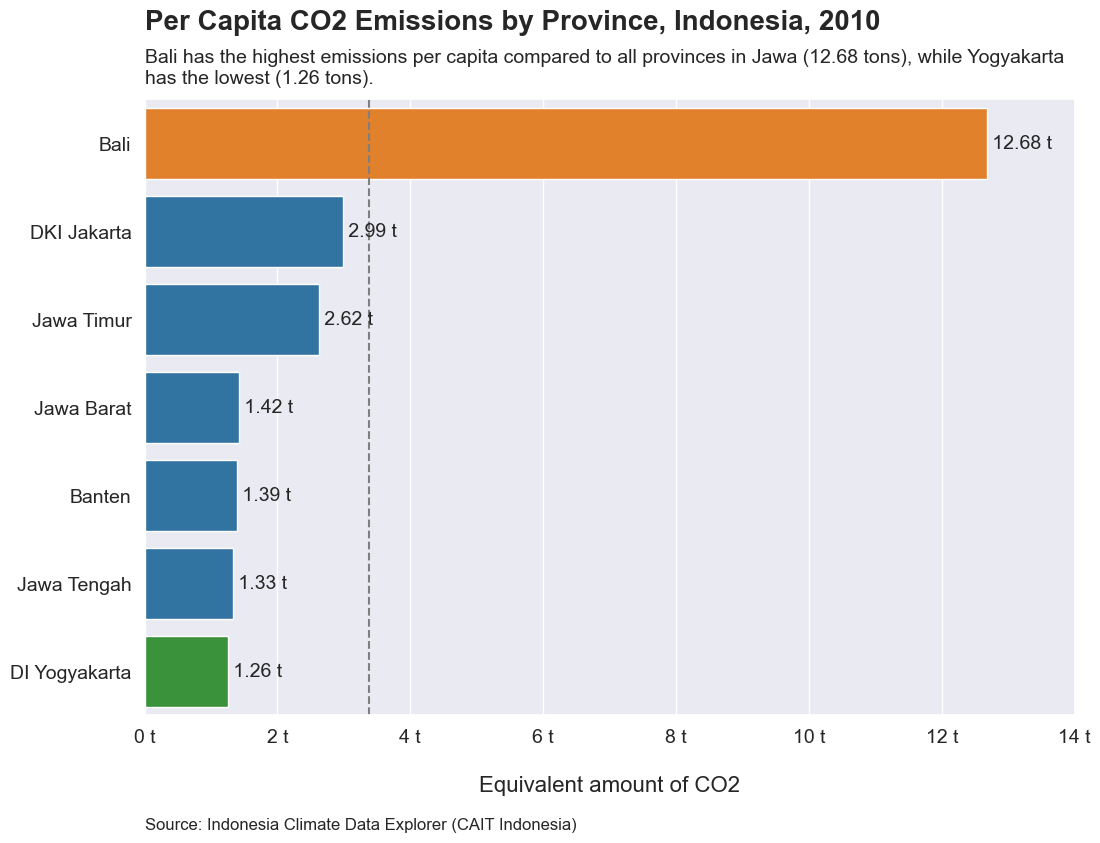

In [510]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Add custom colors for highlight
colors = []
for i in range(len(jawa_bali_df)):
    if i == 0:
        colors.append('tab:orange')
    elif i == len(jawa_bali_df) - 1:
        colors.append('tab:green')
    else:
        colors.append('tab:blue')

# Horizontal bar plot
sns.barplot(x='Emissions (tCO2e/capita)', y='Province', data=jawa_bali_df, order=order, palette=colors)

# Add the average line
ax.axvline(avg_tCO2e, color='tab:gray', linestyle='--', label='Average')

# Label
ax.set_xlabel('\nEquivalent amount of CO2', fontsize=16)
ax.set_ylabel('')
plt.bar_label(ax.containers[0], fmt=' %.2f t', fontsize=14)
plt.xlim(0, 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Format the y-axis tick labels
def format_x_ticks(value, _):
    return f'{value:.0f} t'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_ticks))

# Title
plt.title('Per Capita CO2 Emissions by Province, Indonesia, 2010',
          fontsize=20, fontweight='bold', loc='left', pad=50)
plt.text(x=0, y=-.4,
         s='Bali has the highest emissions per capita compared to all provinces in Jawa (12.68 tons), while Yogyakarta\nhas the lowest (1.26 tons).\n',
         fontsize=14, ha='left', va='bottom')
plt.text(x=0, y=7.75,
         s='Source: Indonesia Climate Data Explorer (CAIT Indonesia)',
         fontsize=12, ha='left', va='center')

plt.show()

In [511]:
# Find the highest and lowest total emissions
max_emissions = jawa_bali_df['Total Emissions (tCO2e)'].astype(float).idxmax()
min_emissions = jawa_bali_df['Total Emissions (tCO2e)'].astype(float).idxmin()

# Calculate the average total emissions
avg_emissions = jawa_bali_df['Total Emissions (tCO2e)'].mean()

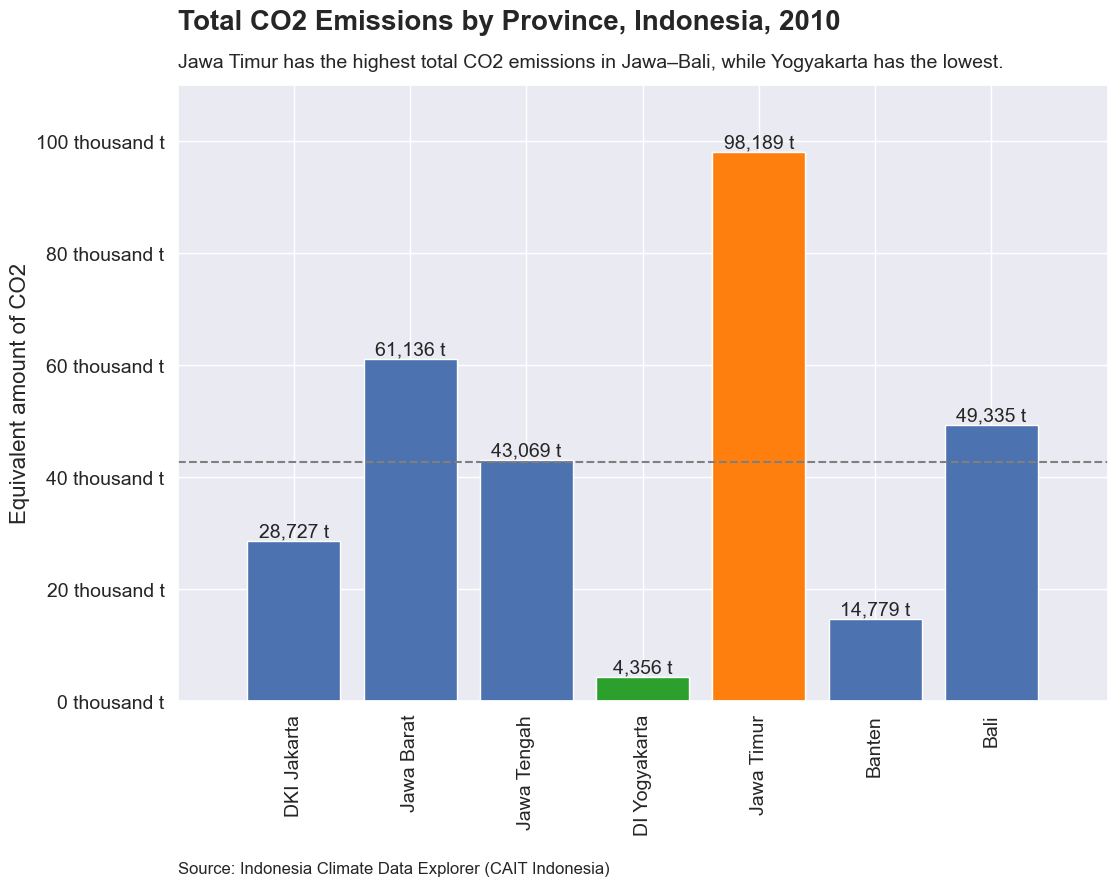

In [512]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot
ax.bar(jawa_bali_df['Province'], jawa_bali_df['Total Emissions (tCO2e)'])

# Add highlight for the highest and lowest total emissions
ax.bar(jawa_bali_df['Province'][max_emissions], jawa_bali_df['Total Emissions (tCO2e)'][max_emissions], color='tab:orange')
ax.bar(jawa_bali_df['Province'][min_emissions], jawa_bali_df['Total Emissions (tCO2e)'][min_emissions], color='tab:green')

# Add the average line
ax.axhline(avg_emissions, color='tab:gray', linestyle='--', label='Average')

# Label
ax.set_xlabel('')
ax.set_ylabel('Equivalent amount of CO2', fontsize=16)
plt.bar_label(ax.containers[0], fmt='{:,.0f} t', fontsize=14)
plt.xlim(-1, 7)
plt.ylim(0, 110000)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# Format the y-axis tick labels
def format_y_ticks(value, _):
    return f'{value/1000:.0f} thousand t' # Ton (t) to kiloton (kt)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))

# Title
plt.title('Total CO2 Emissions by Province, Indonesia, 2010',
          fontsize=20, fontweight='bold', loc='left', pad=40)
plt.text(x=-1, y=112500,
         s='Jawa Timur has the highest total CO2 emissions in Jawa–Bali, while Yogyakarta has the lowest.',
         fontsize=14, ha='left', va='bottom')
plt.text(x=-1, y=-30000,
         s='Source: Indonesia Climate Data Explorer (CAIT Indonesia)',
         fontsize=12, ha='left', va='center')

plt.show()

### Emissions dataset

In [513]:
historical_emissions.head()

,ISO,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,WORLD,World,Climate Watch,Total including LUCF,All GHG,MtCO₂e,47513.15,49880.60,49585.91,48390.92,47691.83,47059.77,47106.48,46443.60,45800.17,45256.47,45080.62,43270.13,43316.76,43061.38,42278.18,40784.41,39849.51,38009.25,37012.72,36066.81,35994.91,35264.63,35261.24,35715.00,34351.00,33960.87,33162.74,32884.18,32736.21,32835.51,32661.42
1,CHN,China,Climate Watch,Total including LUCF,All GHG,MtCO₂e,12295.62,12085.05,11877.10,11366.60,11126.01,11097.28,11233.38,11154.26,10667.19,10382.27,9882.38,9051.17,8477.05,8221.63,7612.85,6934.07,6161.01,5395.93,4723.40,4430.46,4221.71,4029.26,4096.86,3978.52,3982.98,3961.46,3558.02,3398.46,3168.74,3039.78,2892.41
2,USA,United States,Climate Watch,Total including LUCF,All GHG,MtCO₂e,5289.13,5819.48,5935.52,5728.79,5783.00,5705.12,5816.48,5769.63,5628.80,5847.39,6063.30,5793.39,6211.30,6397.65,6293.17,6382.16,6362.59,6279.82,6215.68,6368.37,6405.57,6242.51,6241.11,6193.38,5933.25,5761.90,5693.42,5599.07,5487.86,5403.58,5448.74
3,IND,India,Climate Watch,Total including LUCF,All GHG,MtCO₂e,3166.95,3380.31,3406.53,3241.44,3116.76,3041.47,3022.20,2840.44,2776.41,2619.73,2581.25,2471.70,2318.00,2218.68,2071.63,1973.19,1901.54,1811.43,1766.72,1747.32,1499.00,1461.25,1383.29,1353.60,1293.39,1244.34,1177.90,1132.63,1099.48,1074.57,1020.11
4,EUU,European Union (27),Climate Watch,Total including LUCF,All GHG,MtCO₂e,2957.36,3236.19,3384.48,3466.09,3446.99,3100.58,3045.44,3190.94,3270.12,3332.02,3701.35,3622.05,3889.96,3982.68,4016.76,4015.94,4040.87,4039.25,3950.29,3964.68,3957.74,3953.14,4028.24,4063.02,4137.82,4024.63,3975.56,3988.02,4062.80,4203.43,4270.49


In [514]:
world_idn_emissions = historical_emissions.loc[(historical_emissions['ISO'] == 'WORLD') | (historical_emissions['ISO'] == 'IDN')].reset_index(drop=True)
world_idn_emissions['ISO'] = world_idn_emissions['ISO'].astype('category')
world_idn_emissions

,ISO,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,WORLD,World,Climate Watch,Total including LUCF,All GHG,MtCO₂e,47513.15,49880.60,49585.91,48390.92,47691.83,47059.77,47106.48,46443.60,45800.17,45256.47,45080.62,43270.13,43316.76,43061.38,42278.18,40784.41,39849.51,38009.25,37012.72,36066.81,35994.91,35264.63,35261.24,35715.00,34351.00,33960.87,33162.74,32884.18,32736.21,32835.51,32661.42
1,IDN,Indonesia,Climate Watch,Total including LUCF,All GHG,MtCO₂e,1475.83,1913.58,1641.42,1395.33,1384.26,2022.03,1973.80,1597.66,1661.05,1641.84,1082.12,1434.93,1037.50,1051.98,1610.81,1187.32,1459.03,1107.33,1440.37,957.49,1128.24,1196.77,1304.17,2072.21,1101.48,1257.55,1220.81,1199.29,1183.03,1161.96,1140.84


In [515]:
df = world_idn_emissions.copy()

In [516]:
# Drop the specified columns
df = df.drop(['Country', 'Data source', 'Sector', 'Gas', 'Unit'], axis=1)

# Set 'Unit' as the index
df.set_index(['ISO'], inplace=True)

# Transpose the DataFrame
df = df.transpose()

# Convert the index to datetime format
df.index = pd.to_datetime(df.index, format='%Y')

# Print the index of the DataFrame
print(df.index)

# Print the DataFrame
print(f'\n{df}')

DatetimeIndex(['2020-01-01', '2019-01-01', '2018-01-01', '2017-01-01',
               '2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01'],
              dtype='datetime64[ns]', freq=None)

ISO            WORLD      IDN
2020-01-01  47513.15  1475.83
2019-01-01  49880.60  1913.58
2018-01-01  49585.91  1641.42
2017-01-01  48390.92  1395.33
2016-01-01  47691.83  1384.26
2015-01-01  47059.77  2022.03
2014-01-01  47106.48  1973.80
2013-01-01  46443.60  1597.66
2012-01-01  45800.17  1661.05
2011-01-01  45256.47  1641.84
2010-01-01  45080.62  1082.12
2009-01-01  43270.13  1434.93
2008-

In [517]:
df[['WORLD', 'IDN']].describe()

ISO,WORLD,IDN
count,31.000000,31.000000
mean,40589.883226,1388.452581
std,5949.626542,309.071948
min,32661.420000,957.490000
25%,35262.935000,1151.400000
50%,40784.410000,1304.170000
75%,46121.885000,1604.235000
max,49880.600000,2072.210000


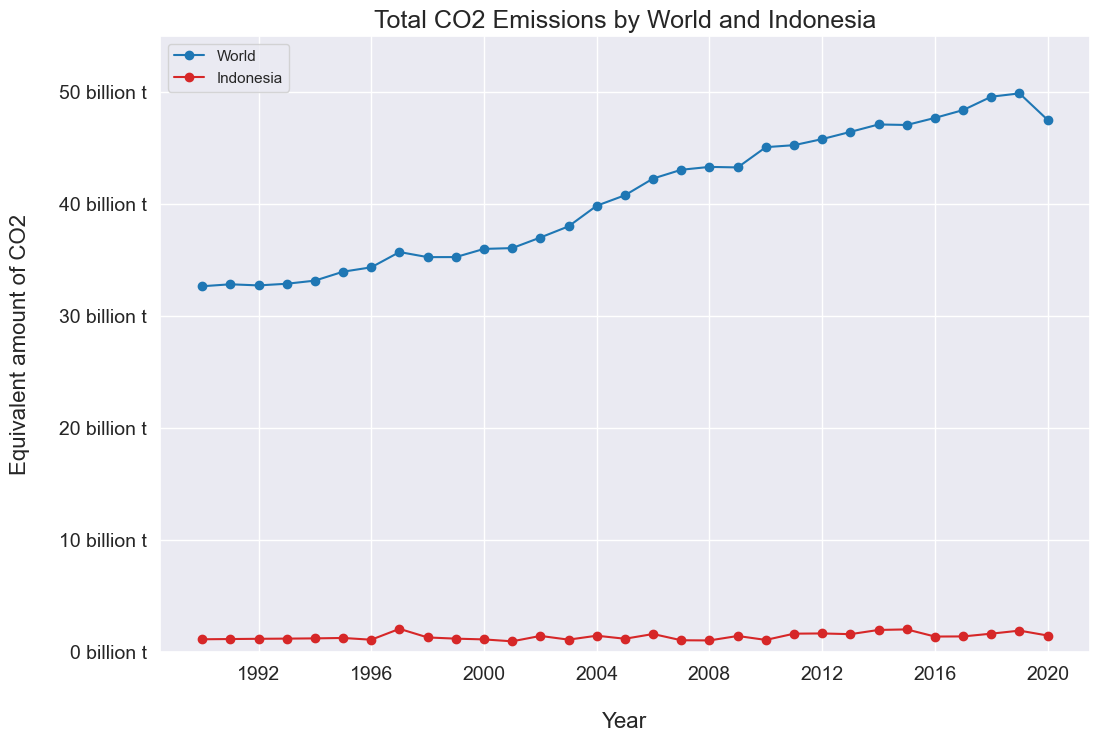

In [518]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Line chart
ax.plot(df.index, df['WORLD'], marker='o', color='tab:blue', label='World')
ax.plot(df.index, df['IDN'], marker='o', color='tab:red', label='Indonesia')

# Set the chart title and labels
ax.set_title('Total CO2 Emissions by World and Indonesia', fontsize=18)
ax.set_xlabel('\nYear', fontsize=16)
ax.set_ylabel('Equivalent amount of CO2\n', fontsize=16)

# Set the y-axis limits
ax.set_ylim(0, 55000)

# Format the y-axis tick labels
def format_y_ticks(value, _):
    return f'{value/1000:.0f} billion t' # Megaton (Mt) to Gigaton (Gt)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))

# Add legend
ax.legend(loc='upper left')

# Set xtick and ytick sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

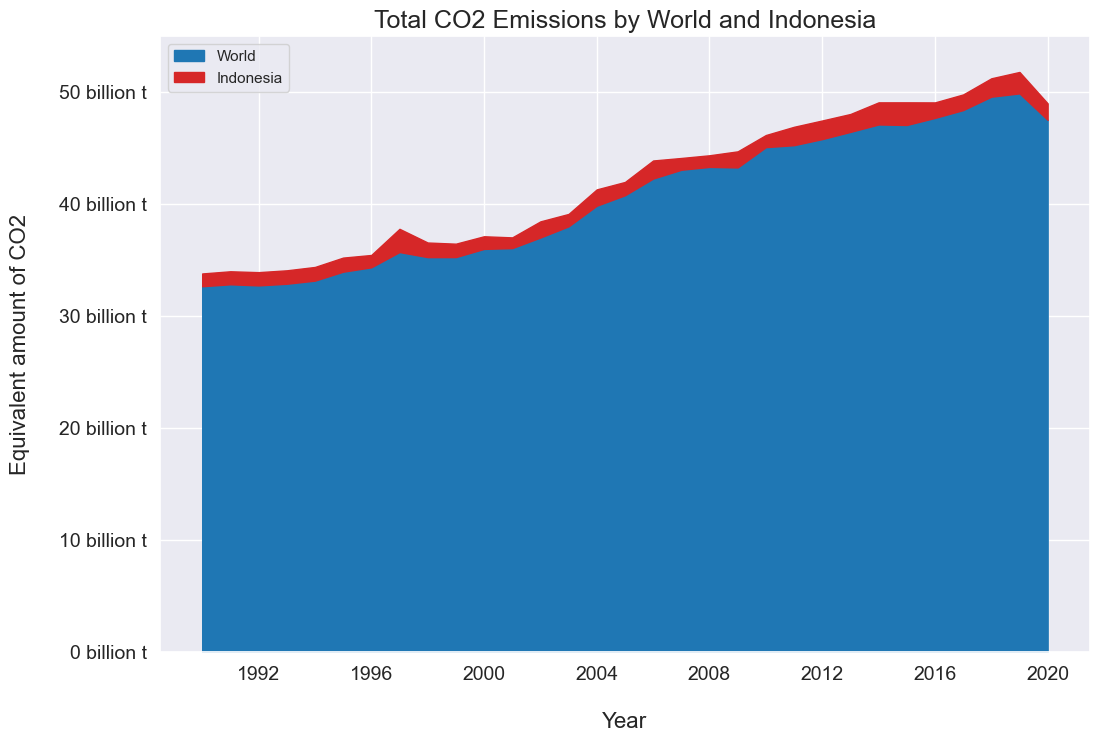

In [519]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Stacked area chart
ax.fill_between(df.index, 0, df['WORLD'], color='tab:blue', label='World')
ax.fill_between(df.index, df['WORLD'], df['IDN'] + df['WORLD'], color='tab:red', label='Indonesia')

# Set the chart title and labels
ax.set_title('Total CO2 Emissions by World and Indonesia', fontsize=18)
ax.set_xlabel('\nYear', fontsize=16)
ax.set_ylabel('Equivalent amount of CO2\n', fontsize=16)

# Set the y-axis limits
ax.set_ylim(0, 55000)

# Format the y-axis tick labels
def format_y_ticks(value, _):
    return f'{value/1000:.0f} billion t' # Megaton (Mt) to Gigaton (Gt)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))

# Add legend
ax.legend(loc='upper left')

# Set xtick and ytick sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()